<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

Created by Zhuo Chen for [Constellate](https://constellate.org) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).<br />
For questions/comments/improvements, email zhuo.chen@ithaka.org or nathan.kelber@ithaka.org.<br />

# Data Visualization

This is lesson 2 of 3 in the educational series on **Data Visualization**. 

**Description:** This notebook focuses on skills for building basic charts using the Python based Matplotlib toolkit. 

We will discuss:

* The Matplotlib architecture
* How to make a scatter plot
* How to make a line graph 
* How to make a bar chart

**Use case:** For Learners (Detailed explanation, not ideal for researchers)

**Difficulty:** Intermediate

**Completion time:** 90 minutes

**Knowledge Required:** 

* Python basics ([start learning Python basics](./python-basics-1.ipynb))
* Pandas ([start learning Pandas](./pandas_1.ipynb))

**Knowledge Recommended:**

Objects, attributes and methods (start learning [object-oriented programming](./python_intermediate_4.ipynb))

**Data Format**: .csv

**Libraries Used**: Pandas, Matplotlib

**Research Pipeline**: None

___

# Intro to Matplotlib

In [1]:
# import the matplotlib library
# import the pyplot module
import matplotlib as mpl
import matplotlib.pyplot as plt

## Matplotlib architecture

Matplotlib has three layers. 

* A Backend layer which renders the plots to the screen or files
    - In this notebook, we are going to use the inline backend. All plots we make in this notebook will be rendered to the screen and each figure we plot will be presented in a separate cell.
    
* An Artist layer that has containers like Figures, Subplot and Axes

* A Scripting layer that creates the artists and put them together

In [2]:
# Use the magic function to set the backend to inline
%matplotlib notebook

When we write some code to plot a figure, the figure displayed on the screen is basically a collection of Artists.


<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataVis2_matplotlib_figureanatomy.png" width=500>

Source: https://matplotlib.org/stable/tutorials/introductory/quick_start.html#figure-parts

## Two ways of using Matplotlib

There are two ways to use Matplotlib. First, we can explicitly interface with the Artist layer by making figures and axes and calling methods on the objects. This is the object-oriented (OO) style. Second, we can use the `plot` function in the `pyplot` module to implicitly create and manage figures and axes, and use the functions in `pyplot` for plotting. This is called the pyplot style.

### The explicit interface: an example

Let's plot a very simple figure by interafcing with the artist layer explicitly. 

<IPython.core.display.Javascript object>


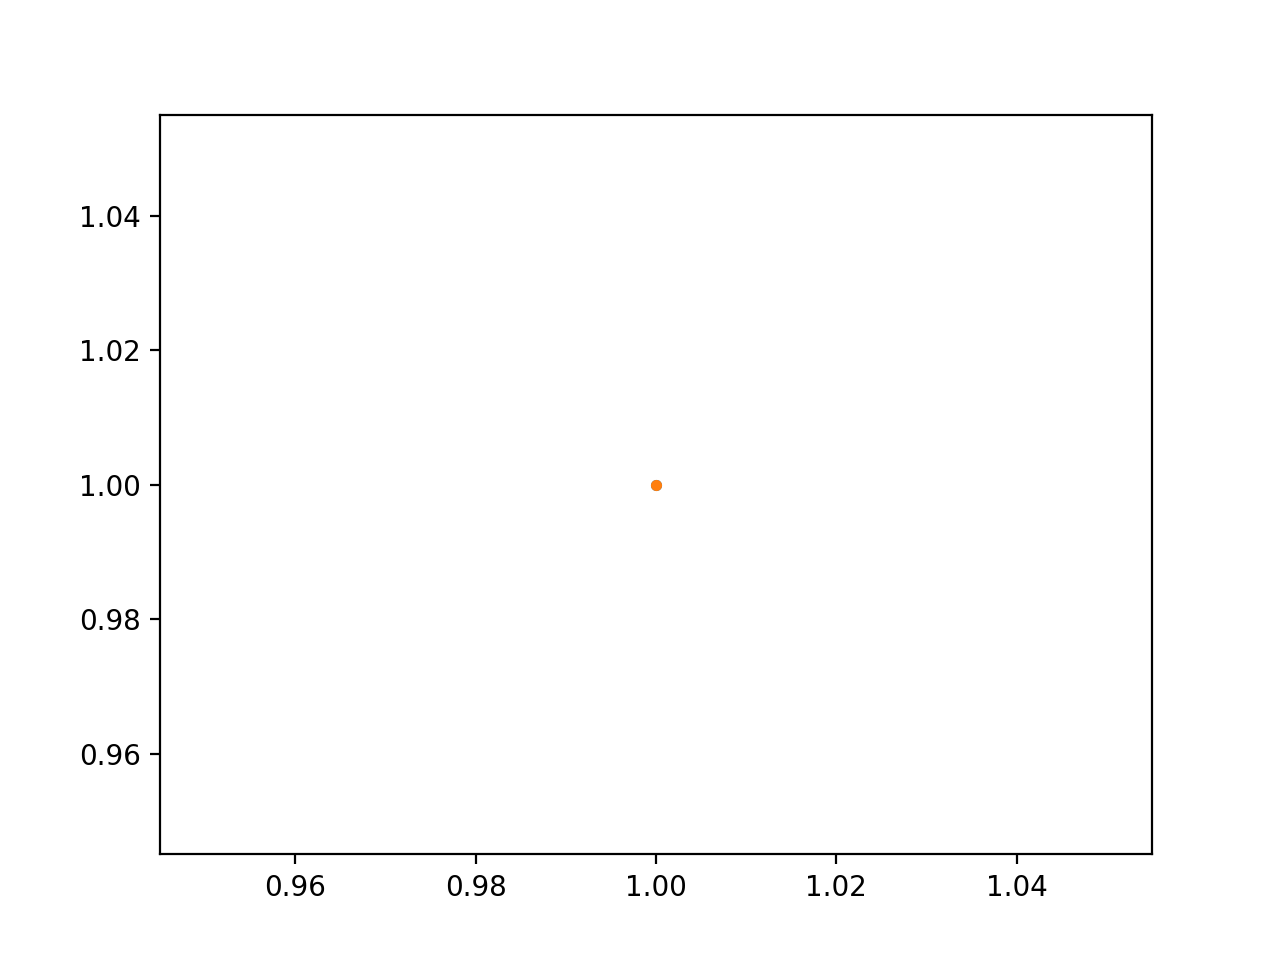

In [3]:
# First, we create a figure with a single axes object
fig, ax = plt.subplots()

# Second, we plot a single data point on the axes object
# by calling the plot method on it
ax.plot(1, 1, '.') 


### The implicit interface: an example

Let's plot the same simple figure in the pyplot style. The function used to plot is called `plot`. Let's take a look at its docstring.

In [4]:
# Take a look at the docstring of the plot function
plt.plot?

The first two arguments to `plot` will be interpreted as x, y pairs. Let's get started by plotting a single data point in a two-dimensional space.

In [5]:
# plot a single point
plt.plot(1, 1, '.')

When you look for examples of plotting with matplotlib on the internet, you will find that there is a lot of confusion about these two different approaches to plotting. In the Matplotlib documentation, the developers of this library say that "[I]n general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused as part of a larger project. However, the pyplot style can be very convenient for quick interactive work."

# Different kinds of plots

Matplotlib has some useful plotting methods in the scripting layer which correspond to different kinds of plots. The major ones include scatterplots, line graphs, and bar charts. In this section, we will learn how to make these charts. 

## Scatterplots

Scatter plots are usually used to show the relationship between different variables. In Matplotlib, we use the `scatter()` function to make a scatter plot. It takes an x-axis value as the first argument and a y-axis value as the second argument. 

In [6]:
# import numpy to generate data points
import numpy as np

<IPython.core.display.Javascript object>


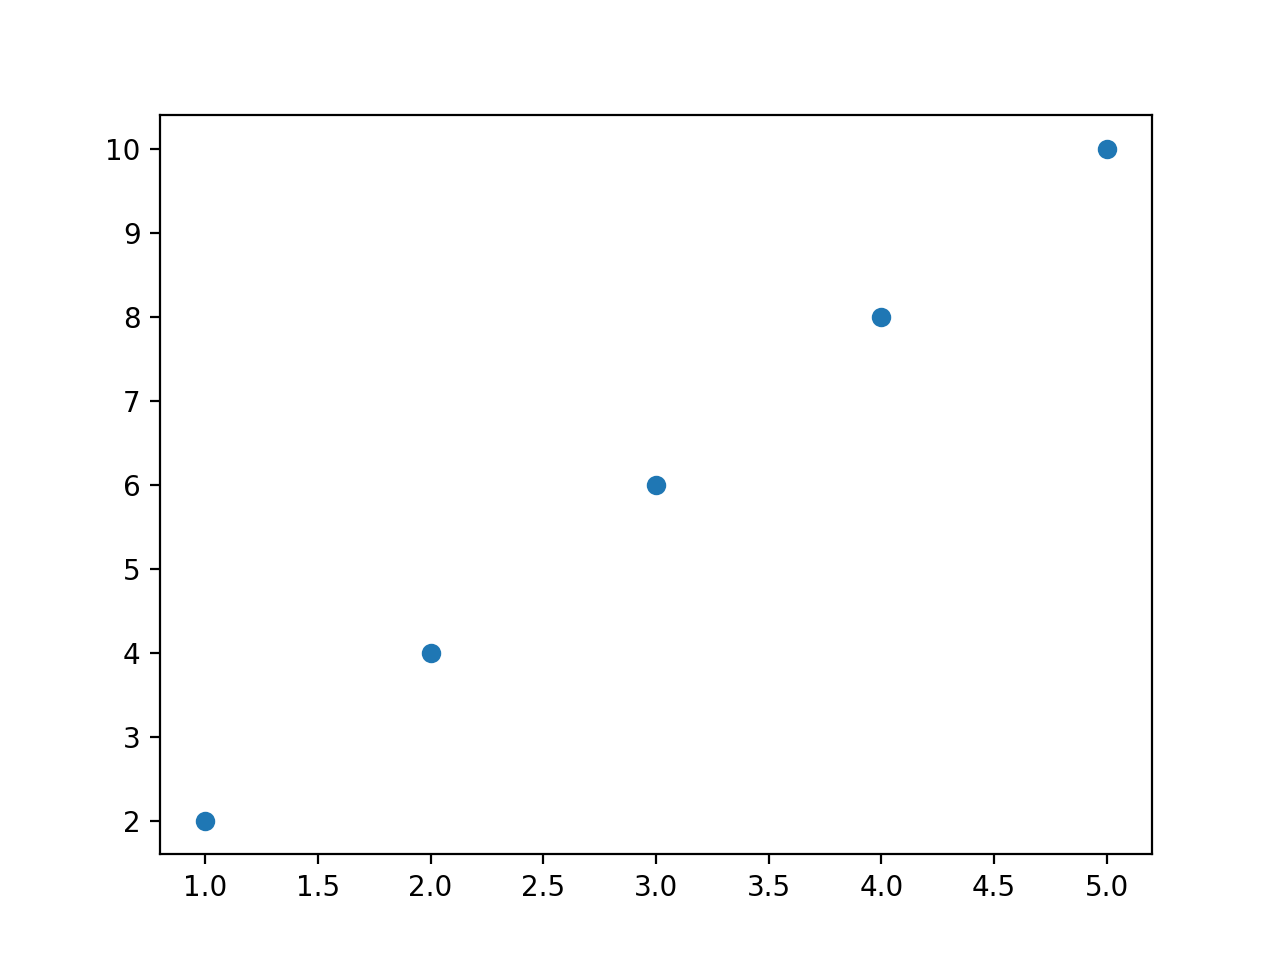

In [7]:
# use numpy to generate the x-axis values
x = np.array([1,2,3,4,5])
y = 2 * x

fig, ax = plt.subplots()
ax.scatter(x, y)

As we can see, the values with the same index in the two arrays x and y are used as the coordinate of a data point. For example, the first element of both arrays is 1. Therefore, (1, 2) is the coordinate of a data point. In the same vein, the coordinates for the other data points are (2, 4), (3, 6), (4, 8), (5, 10). 

### Slicing and coloring

When you make a scatter plot, you can slice the data series into smaller data series and then color them differently. This is commonly used when the data are categorically grouped. 

Suppose you are a middle school teacher and you teach two classes, the Hippo class and the Butterfly class. You have an excel file that contains the names of the studenss, the grades of the most recent English test, the number of English novels the students have completed reading so far in the semester and from which class they are from.   

|Name|English|Novel|Class|
|---|---|---|---|
|Alex Beverly|80|3|Hippo|
|Adrian Clark|70|2|Hippo|
|Ari Jay|72|2|Hippo|
|May Lee|85|5|Butterfly|
|Max White|90|6|Butterfly|
|Michelle Tsai|92|10|Butterfly|

Let's say you want to make a scatter plot with the number of novels read as the x-axis and the English grades as the y-axis. 

In [8]:
# Make a dataframe 
import pandas as pd
eng_grades = pd.DataFrame({'Name': ['Alex Beverly',
                                    'Adrian Clark',
                                    'Ari Jay',
                                    'May Lee',
                                    'Max White',
                                    'Michelle Tsai'],
                           'English':[80, 
                                     70,
                                     72,
                                     85,
                                     90,
                                     95],
                           'Novel':[3,
                                   1,
                                   2,
                                   6,
                                   8,
                                   10],
                           'Class':['Hippo',
                                    'Hippo',
                                    'Hippo',
                                    'Butterfly',
                                    'Butterfly',
                                    'Butterfly'
                                   ]})
eng_grades

,Name,English,Novel,Class
0,Alex Beverly,80,3,Hippo
1,Adrian Clark,70,1,Hippo
2,Ari Jay,72,2,Hippo
3,May Lee,85,6,Butterfly
4,Max White,90,8,Butterfly
5,Michelle Tsai,95,10,Butterfly


You can get the x values and y values from the relevant columns.

In [9]:
# Get the x values and y values
x = eng_grades['Novel']
y = eng_grades['English']

Then, you can slice the x series and y series to get the x values and y values for the two classes. After that, you can plot the data for the two classes separately onto one scatter plot. 

Note that there is a `label` parameter of the `scatter()` method. Giving the data series different labels allows us to build a legend. 

<IPython.core.display.Javascript object>


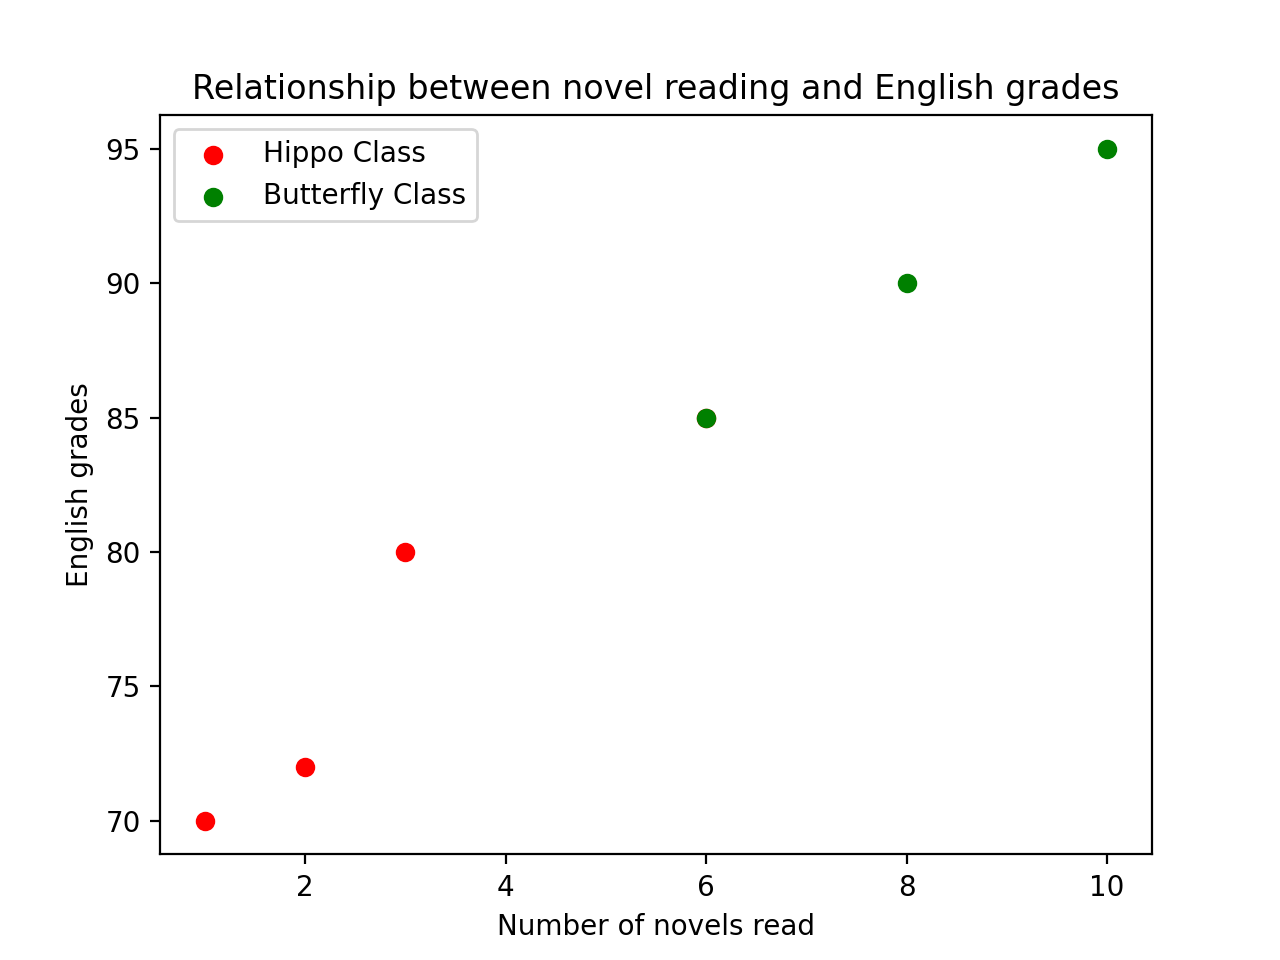

In [10]:
# Plot two data series on one scatter plot
fig, ax = plt.subplots()
ax.scatter(x.loc[:3], y.loc[:3], c='red', label='Hippo Class')
ax.scatter(x.loc[3:], y.loc[3:], c='green', label='Butterfly Class')

This scatter plot looks incomplete. The x-axis and y-axis do not have labels yet. Readers will not be able to understand what they represent or the units they describe. Also, we need a legend telling the readers what the different colors of the data points mean. Last, we need a title for this figure. 

The axis labels, the legend and the title of a figure are called Artists. It is easy to add these Artists to the axes object we have created.

<IPython.core.display.Javascript object>


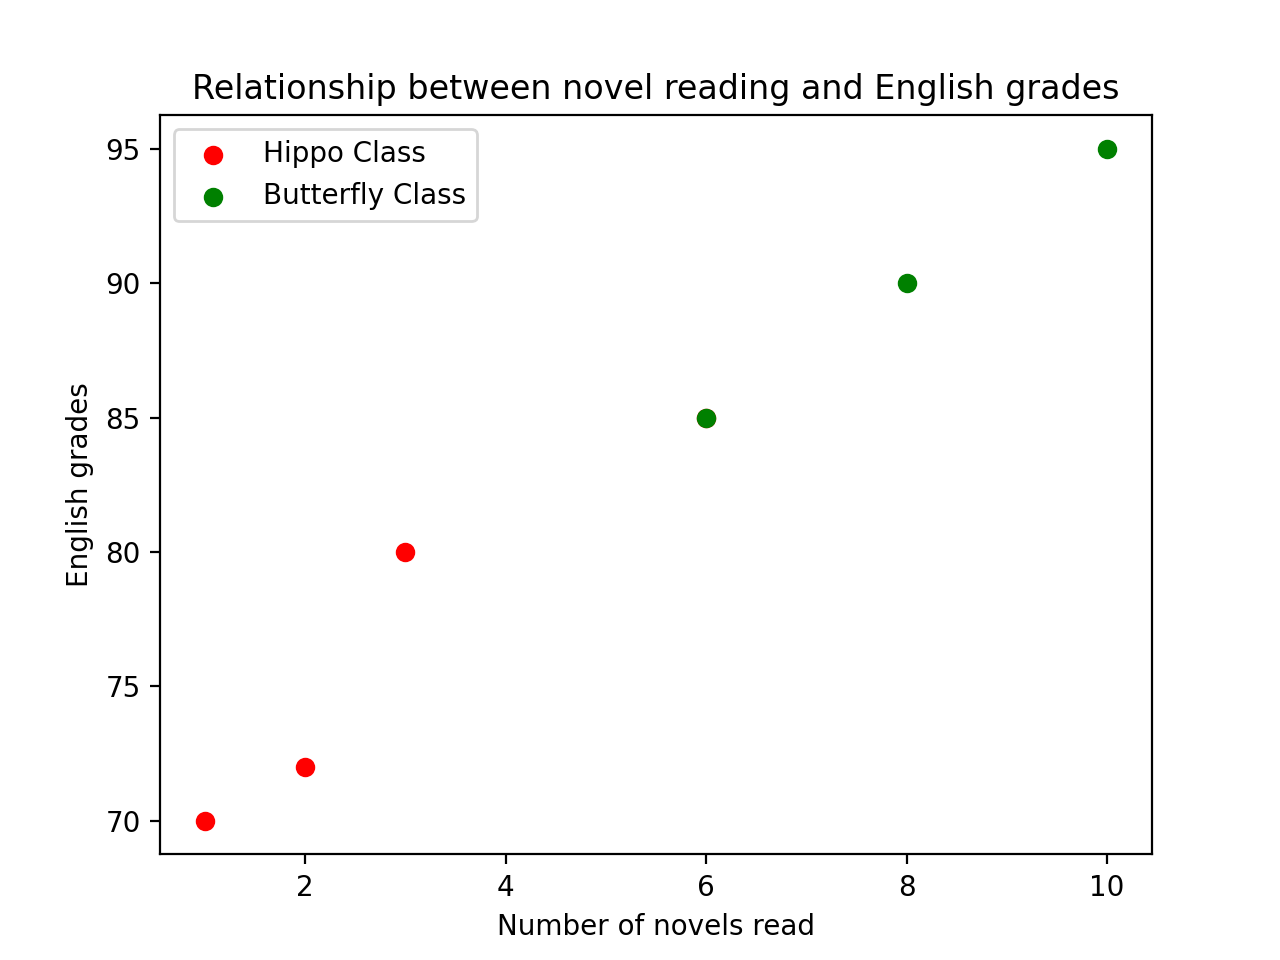

In [11]:
# make a label for the x-axis
ax.set_xlabel('Number of novels read')

# make a label for the y-axis
ax.set_ylabel('English grades')

# make a title for the figure
ax.set_title('Relationship between novel reading and English grades')

# add a legend
ax.legend(loc='upper left')

# render the figure
fig

<h3 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h3>


## Line graphs

A line graph contains points connected by line segments. It is commonly used to demonstrate changes in value. The horizontal axis holds a value that has a continuous progression, which is often the time, and the vertical axis shows the change in value of a certain variable across that progression.

Let's use the childhood lead poisoning data from [Mass.gov](https://www.mass.gov/info-details/childhood-lead-poisoning-data) as an example. Suppose we are interested in the data on lead poisoning in children between 9 and 48 months of age in the county of Lowell from 2012 - 2020. Specifically, we are interested in those children with estimated confirmed blood lead levels $\geq$ 5$\mu g/dL$, which is regarded as high risk. 

In [12]:
# download the sample file

from pathlib import Path
import urllib.request

# Check if a data folder exists. If not, create it.
data_folder = Path('./data/')
data_folder.mkdir(exist_ok=True)

# Get the url to the file and download it to the data folder
url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz2_childhood_lead_poisoning.csv'
urllib.request.urlretrieve(url, './data/lead_poisoning.csv')

# Success message
print('Sample file ready.')

Sample file ready.


Again, let's go to `File->Open->data` to find the downloaded file and take a look. 

In [13]:
# create a dataframe from the csv file
lead = pd.read_csv('./data/lead_poisoning.csv')
lead

,Geo Description,Year,BLL Category,Sex,Case Count,Lead Screening Count,Rate,95% Confidence Interval,State BLL Case Count,State Lead Screening Count,...,High-risk,Stability,Average(BLL Case Count),Average(Lead Screening Count),Total(Rate),95 percent Total(Confidence Interval),State Average BLL Cases Count,State Average Screening Count,State Rate,Statistical Significance for Annual Average
0,Lowell,2012,Estimated Confirmed  5 g/dL (elevated),Female,51,1916,26.6,19.3 - 33.9,1988,85685,...,Yes,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lowell,2012,Estimated Confirmed  5 g/dL (elevated),Male,74,2071,35.7,27.5 - 43.8,2454,89764,...,Yes,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lowell,2012,Estimated Confirmed  5 g/dL (elevated),Total,125,3987,31.4,25.8 - 36.8,4442,175449,...,Yes,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lowell,2013,Estimated Confirmed  5 g/dL (elevated),Female,69,1992,34.6,26.4 - 42.8,1693,87168,...,Yes,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lowell,2013,Estimated Confirmed  5 g/dL (elevated),Male,73,2107,34.6,26.6 - 42.5,2079,91383,...,Yes,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Lowell,2013,Estimated Confirmed  5 g/dL (elevated),Total,142,4099,34.6,28.9 - 40.3,3772,178551,...,Yes,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Lowell,2014,Estimated Confirmed  5 g/dL (elevated),Female,45,1930,23.3,16.5 - 30.1,1711,86280,...,Yes,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Lowell,2014,Estimated Confirmed  5 g/dL (elevated),Male,64,2023,31.6,23.8 - 39.3,1995,90632,...,Yes,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Lowell,2014,Estimated Confirmed  5 g/dL (elevated),Total,109,3953,27.6,22.3 - 32.7,3706,176912,...,Yes,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Lowell,2015,Estimated Confirmed  5 g/dL (elevated),Female,39,1836,21.2,14.5 - 27.9,1514,84927,...,Yes,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# get a general idea of the data
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Geo Description                              27 non-null     object 
 1   Year                                         27 non-null     int64  
 2   BLL Category                                 27 non-null     object 
 3   Sex                                          27 non-null     object 
 4   Case Count                                   27 non-null     int64  
 5   Lead Screening Count                         27 non-null     int64  
 6   Rate                                         27 non-null     float64
 7   95% Confidence Interval                      27 non-null     object 
 8   State BLL Case Count                         27 non-null     int64  
 9   State Lead Screening Count                   27 non-null     int64  
 10  Stat

What we are interested in are the `Rate` column and `State Rate per 1,000` column and we would like to plot a line graph to show the increase/decrease of the rate of children with high risk lead level in their blood between 2012 - 2020. For now, assume that we just want to plot the data for all the children regardless of their sex.

In [15]:
# Drop the unnecessary columns
lead_copy = lead[['Year', 'Sex', 'Rate', 'State Rate per 1,000']].copy()

# Change the rate per 1000 to percentage 
lead_copy['Rate'] = lead_copy['Rate'] * 0.1
lead_copy['State Rate per 1,000'] = lead_copy['State Rate per 1,000'] * 0.1


# Update the column name for the Lowell rate column
lead_copy = lead_copy.rename(columns={'Rate': 'Lowell Percentage', 'State Rate per 1,000': 'State Percentage'})

# Take a look at the updated dataframe
lead_copy

,Year,Sex,Lowell Percentage,State Percentage
0,2012,Female,2.66,2.320126
1,2012,Male,3.57,2.733835
2,2012,Total,3.14,2.531790
3,2013,Female,3.46,1.942227
4,2013,Male,3.46,2.275040
5,2013,Total,3.46,2.112562
6,2014,Female,2.33,1.983078
7,2014,Male,3.16,2.201209
8,2014,Total,2.76,2.094827
9,2015,Female,2.12,1.782708


In [16]:
# take a look at the range of rates in the two columns of interest
print(lead_copy['Lowell Percentage'].min(), lead_copy['Lowell Percentage'].max())
print(lead_copy['State Percentage'].min(), lead_copy['State Percentage'].max())

1.8600000000000003 3.5700000000000003
1.1139917840000002 2.733835391


<IPython.core.display.Javascript object>


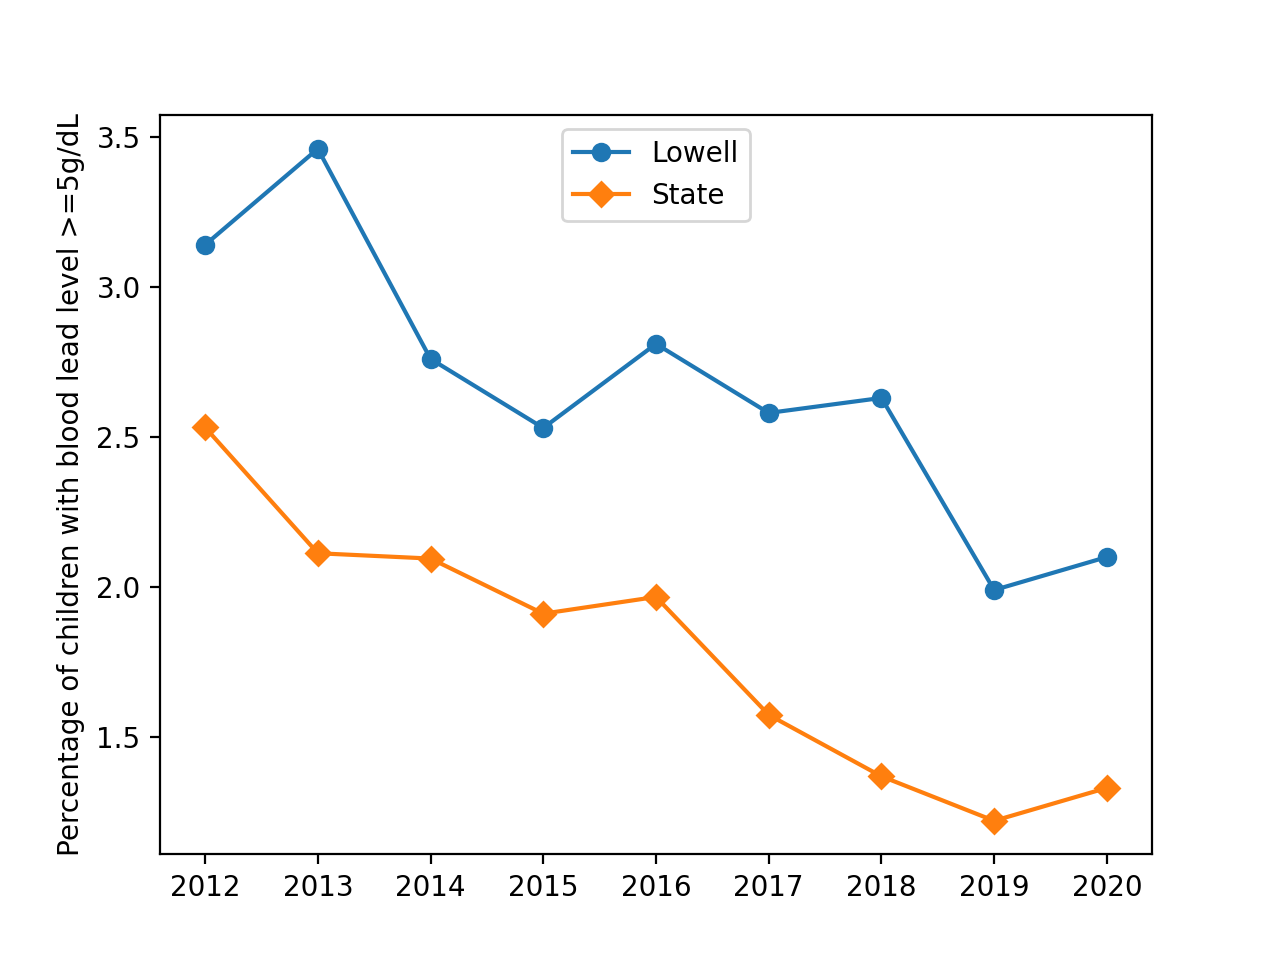

Text(0, 0.5, 'Percentage of children with blood lead level >=5g/dL')

In [17]:
# Plot the line graph
x = range(2012, 2021)

# Get the rate of children with high risk BLL in Lowell
rate = lead_copy.loc[lead_copy['Sex']=='Total', 'Lowell Percentage'].tolist()

# plot a line for the Lowell data
fig, ax = plt.subplots()
ax.plot(x, rate,'o-',label='Lowell') # plot the line for the Lowell

# Give a y-axis label
ax.set_ylabel('Percentage of children with blood lead level >=5g/dL')

How does the rate of children with high risk BLL compare to that of the entire state? We can add a line showing the state rate. 

<IPython.core.display.Javascript object>


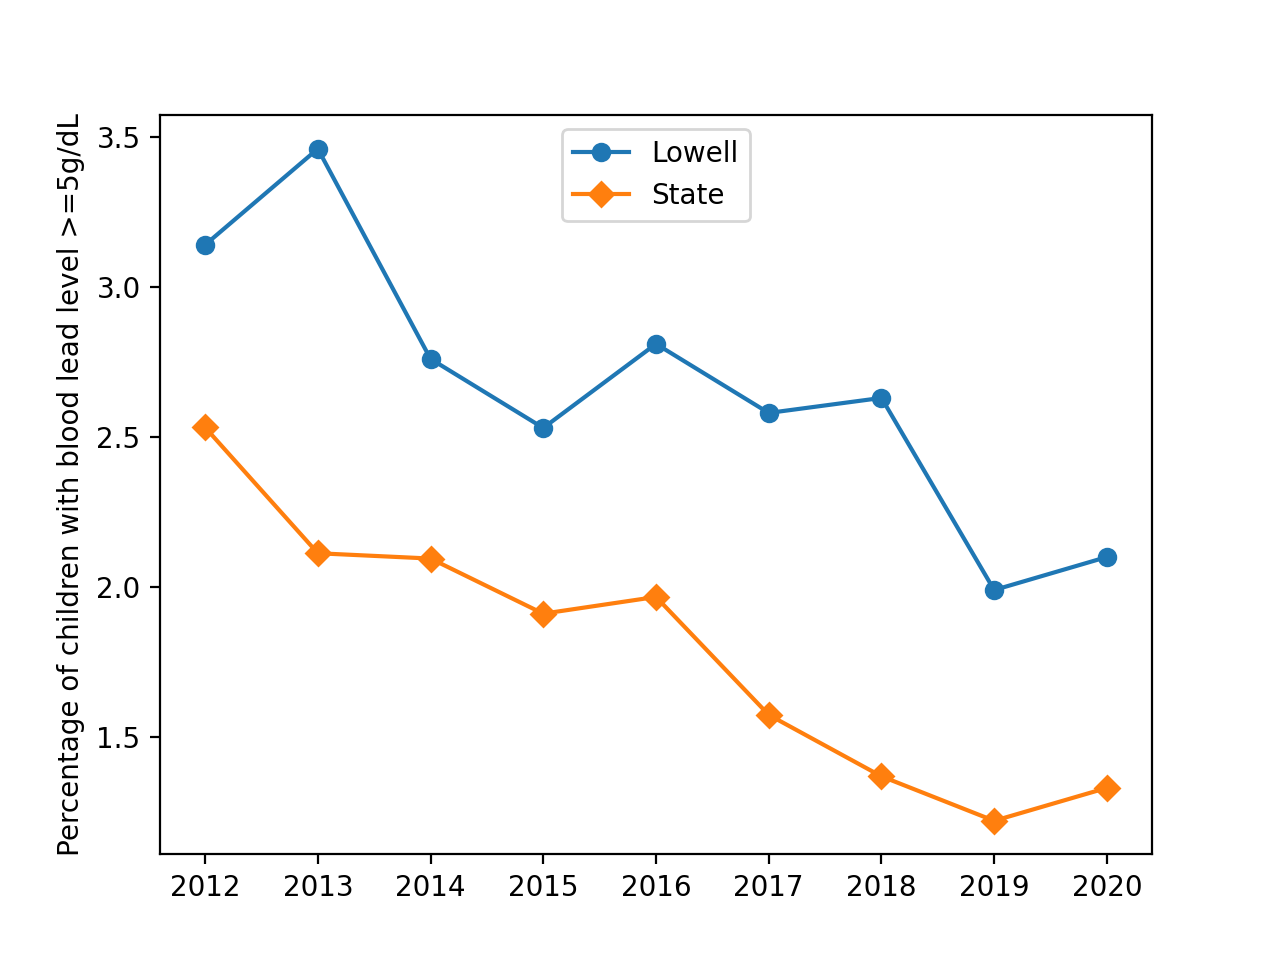

In [18]:
### add a line for the statewide data

# get the data of the rate of the children with high risk BLL in the entire state
state_rate = lead_copy.loc[lead_copy['Sex']=='Total', 'State Percentage'].tolist()
ax.plot(x, state_rate,'D-',label='State')

# Add a legend
ax.legend(loc='upper center')
fig

<h3 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h3>

It's your turn to write some code and plot a line graph! 

You have seen that the dataframe we created from the original csv file contains data for both female and male children between 9 and 48 months old in the county of Lowell. Can you plot a line graph with two lines, one showing the percentage of female children with blood lead level >= 5g/dL and one showing the percentage of the male children with blood lead level >=5g/dL? 

## Bar charts

A bar chart plots numeric values for different categorical values as bars. The categorical values are plotted on one axis, and the numerical values are plotted on the other axis. 

### Vertical bar charts

In a vertical bar chart, the x-axis holds categorial values and the y-axis holds numerical values. Each categorical value claims one bar, and the height of each bar shows the magnitude of the bar's value. The bars are plotted on a common baseline to allow for easy comparison of values. 

Let's use the opioid addiction data from [Mass.gov](https://www.mass.gov/info-details/addiction-opioid-use) to make a bar chart. The data is stored in a `.csv` file.

In [19]:
# Download the file
url = 'https://www.mass.gov/doc/data-download-opioid-addition-phit-data-story/download'
urllib.request.urlretrieve(url, './data/opiod_addiction.csv')

# Success message
print('Sample file ready.')

Sample file ready.


Let's go take a look at the downloaded file before reading it into a dataframe. 
Go to `File -> open -> data` to find the file.

As we can see, there are two charts in the csv file. Suppose we are interested in the first chart titled "Opioid-Related Overdose Death Rates (2014-2020)". After reading in the data, we will need to do some preprocessing to reduce the data to what we are interested in.

In [20]:
# Make a dataframe 
opioid = pd.read_csv('./data/opiod_addiction.csv')
opioid

,Category: Addiction,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Source: Massachusetts DPH Opioid Report,NaN,NaN,NaN,NaN
1,Chart: Opioid-Related Overdose Death Rates (20...,NaN,NaN,NaN,NaN
2,"Note: Data for Asian, NH females were excluded...",NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Year,Race/Ethnicity,Measure,Sex,"Age-Adjusted Rate per 100,000"
...,...,...,...,...,...
87,2021,"Black, NH",Median Age at Initial Admission,35,NaN
88,2021,Hispanic,Median Age at Initial Admission,34,NaN
89,2021,Multiracial,Median Age at Initial Admission,36,NaN
90,2021,"Asian, NH",Median Age at Initial Admission,33,NaN


We saw that in the csv file, the metadata of the second chart begins in row 55. Let's slice the dataframe to identify the ending row of the first chart. We can get rows with indexes 50 - 60 and take a look. 

In [21]:
# Get the ending line of the first chart
opioid.loc[50:60]

,Category: Addiction,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
50,2017,"Asian/Pacific Islander, NH",Confirmed Opioid-Related Overdose Death Rate,Male,4.9
51,2018,"Asian/Pacific Islander, NH",Confirmed Opioid-Related Overdose Death Rate,Male,6.6
52,2019,"Asian/Pacific Islander, NH",Confirmed Opioid-Related Overdose Death Rate,Male,4
53,2020,"Asian/Pacific Islander, NH",Confirmed Opioid-Related Overdose Death Rate,Male,6.2
54,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN
56,Category: Addiction,NaN,NaN,NaN,NaN
57,Source: Bureau of Substance Addiction Services,NaN,NaN,NaN,NaN
58,"Notes: Opioid includes heroin, fentanyl, non-R...",NaN,NaN,NaN,NaN
59,Chart: Median Age of New Clients at Initial Ad...,NaN,NaN,NaN,NaN


Now, let's drop the data of the second chart and reduce our dataframe to the first chart. 

In [22]:
# Preprocess the dataframe
opioid = opioid.drop(opioid.index[54:]) # drop the data from the second chart 

# drop the metadata of the first chart, rename the columns with row 5, drop row 5 and reset the index
opioid = opioid.drop(opioid.index[:4]).rename(columns=opioid.loc[4]).drop(index=4).reset_index(drop=True)
opioid

,Year,Race/Ethnicity,Measure,Sex,"Age-Adjusted Rate per 100,000"
0,2014,"White, NH",Confirmed Opioid-Related Overdose Death Rate,Female,13.8
1,2015,"White, NH",Confirmed Opioid-Related Overdose Death Rate,Female,15.6
2,2016,"White, NH",Confirmed Opioid-Related Overdose Death Rate,Female,19.9
3,2017,"White, NH",Confirmed Opioid-Related Overdose Death Rate,Female,16.7
4,2018,"White, NH",Confirmed Opioid-Related Overdose Death Rate,Female,19.5
5,2019,"White, NH",Confirmed Opioid-Related Overdose Death Rate,Female,17.4
6,2020,"White, NH",Confirmed Opioid-Related Overdose Death Rate,Female,18.8
7,2014,"Black, NH",Confirmed Opioid-Related Overdose Death Rate,Female,8.2
8,2015,"Black, NH",Confirmed Opioid-Related Overdose Death Rate,Female,9
9,2016,"Black, NH",Confirmed Opioid-Related Overdose Death Rate,Female,10.7


Suppose we would like to plot a bar chart showing the age-adjusted death rate from 2014 - 2020 for the males in each race group. The years will be plotted on the x-axis and the rate will be plotted on the y-axis. Each year will have as many bars as there are race groups in the dataframe. 

In [23]:
# Filter the dataframe to get the data for males
opioid = opioid.loc[opioid['Sex']=='Male'].reset_index()

# Round the death rate to 2 decimal places
opioid['Age-Adjusted Rate per 100,000'] = round(opioid['Age-Adjusted Rate per 100,000'].astype(float), 2)

In [24]:
# Get the race groups in the dataframe
race = opioid['Race/Ethnicity'].unique()
race = np.sort(race) # Sort the racial groups by alphabetical order

In [25]:
# Get the x values
years = list(range(2014, 2021))

# Get the y values
death_rate = {r: opioid.loc[opioid['Race/Ethnicity']==r, 'Age-Adjusted Rate per 100,000'].tolist() 
              for r in race
             }

In [26]:
death_rate

{'Asian/Pacific Islander, NH': [3.6, 3.5, 4.8, 4.9, 6.6, 4.0, 6.2],
 'Black, NH': [14.5, 22.8, 22.7, 34.8, 22.8, 32.6, 57.1],
 'Hispanic': [27.1, 34.7, 54.0, 55.0, 53.0, 57.2, 59.8],
 'White, NH': [34.2, 46.9, 53.3, 51.0, 49.5, 49.5, 47.6]}

<IPython.core.display.Javascript object>


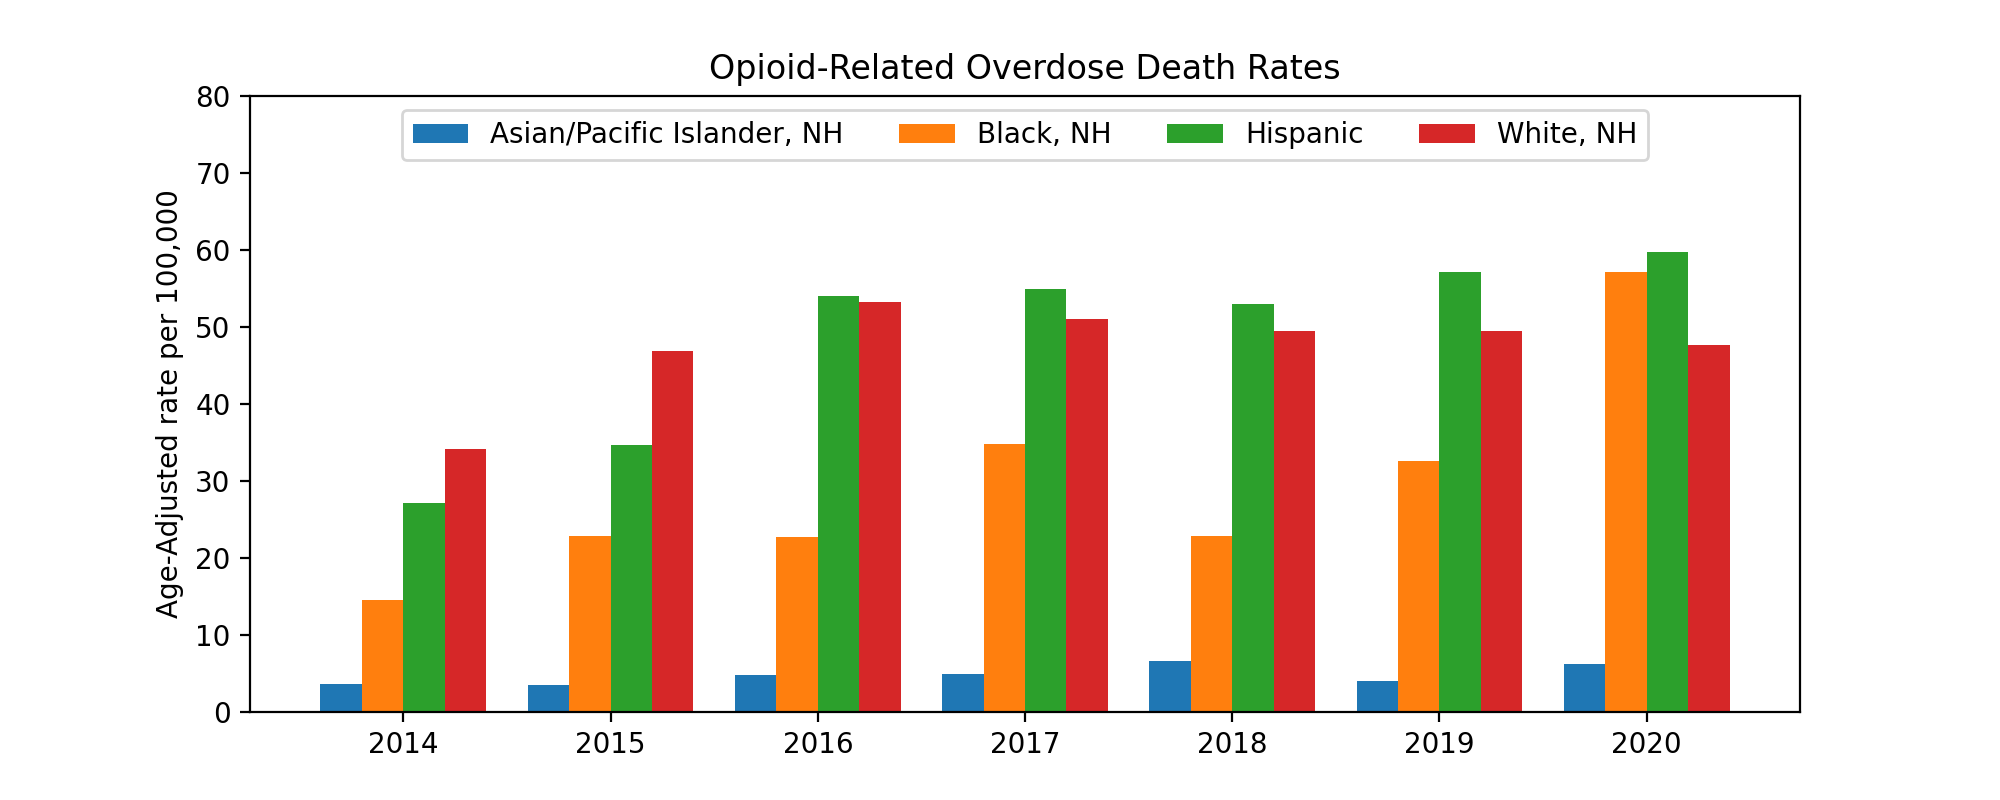

(0.0, 80.0)

In [27]:
### Plot the bar chart

# Create the x label locations 
x = np.arange(len(years))  # the label locations
width = 0.2  # the width of the bars
multiplier = -2

fig, ax = plt.subplots(figsize=(10, 4))

for race, drate in death_rate.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, drate, width, label=race, align='edge')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Age-Adjusted rate per 100,000')
ax.set_title('Opioid-Related Overdose Death Rates')
ax.set_xticks(x, years)
ax.legend(loc='upper center', ncol=4)
ax.set_ylim(0, 80)

### Horizontal bar charts

It's a good idea to use a horizontal bar chart when the category labels are really long. In a vertical bar chart, you may need to rotate the labels for them not to be overlapped, and the horizontal orientation nicely avoids this issue.

In a horizontal bar chart, the x-axis holds numerical values and the y-axis holds categorical values. Each categorical value claims one bar, and the length of each bar shows the magnitude of the bar's value. The bars are plotted on a common baseline to allow for easy comparison of values. 

In the last section, we focused on the childhood lead poisoning data in the town of Lowell. In this section, let's get the childhood lead poisoning data across all the counties in Massachusetts in 2020. 

In [28]:
# Download the file
url='https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz2_ChildhoodLeadPoisoning_County_2020.csv'
urllib.request.urlretrieve(url, './data/lead_poisoning_county_2020.csv')

# Success message
print('Sample file ready.')

Sample file ready.


In [29]:
# create a dataframe
lead_county = pd.read_csv('./data/lead_poisoning_county_2020.csv')

<IPython.core.display.Javascript object>


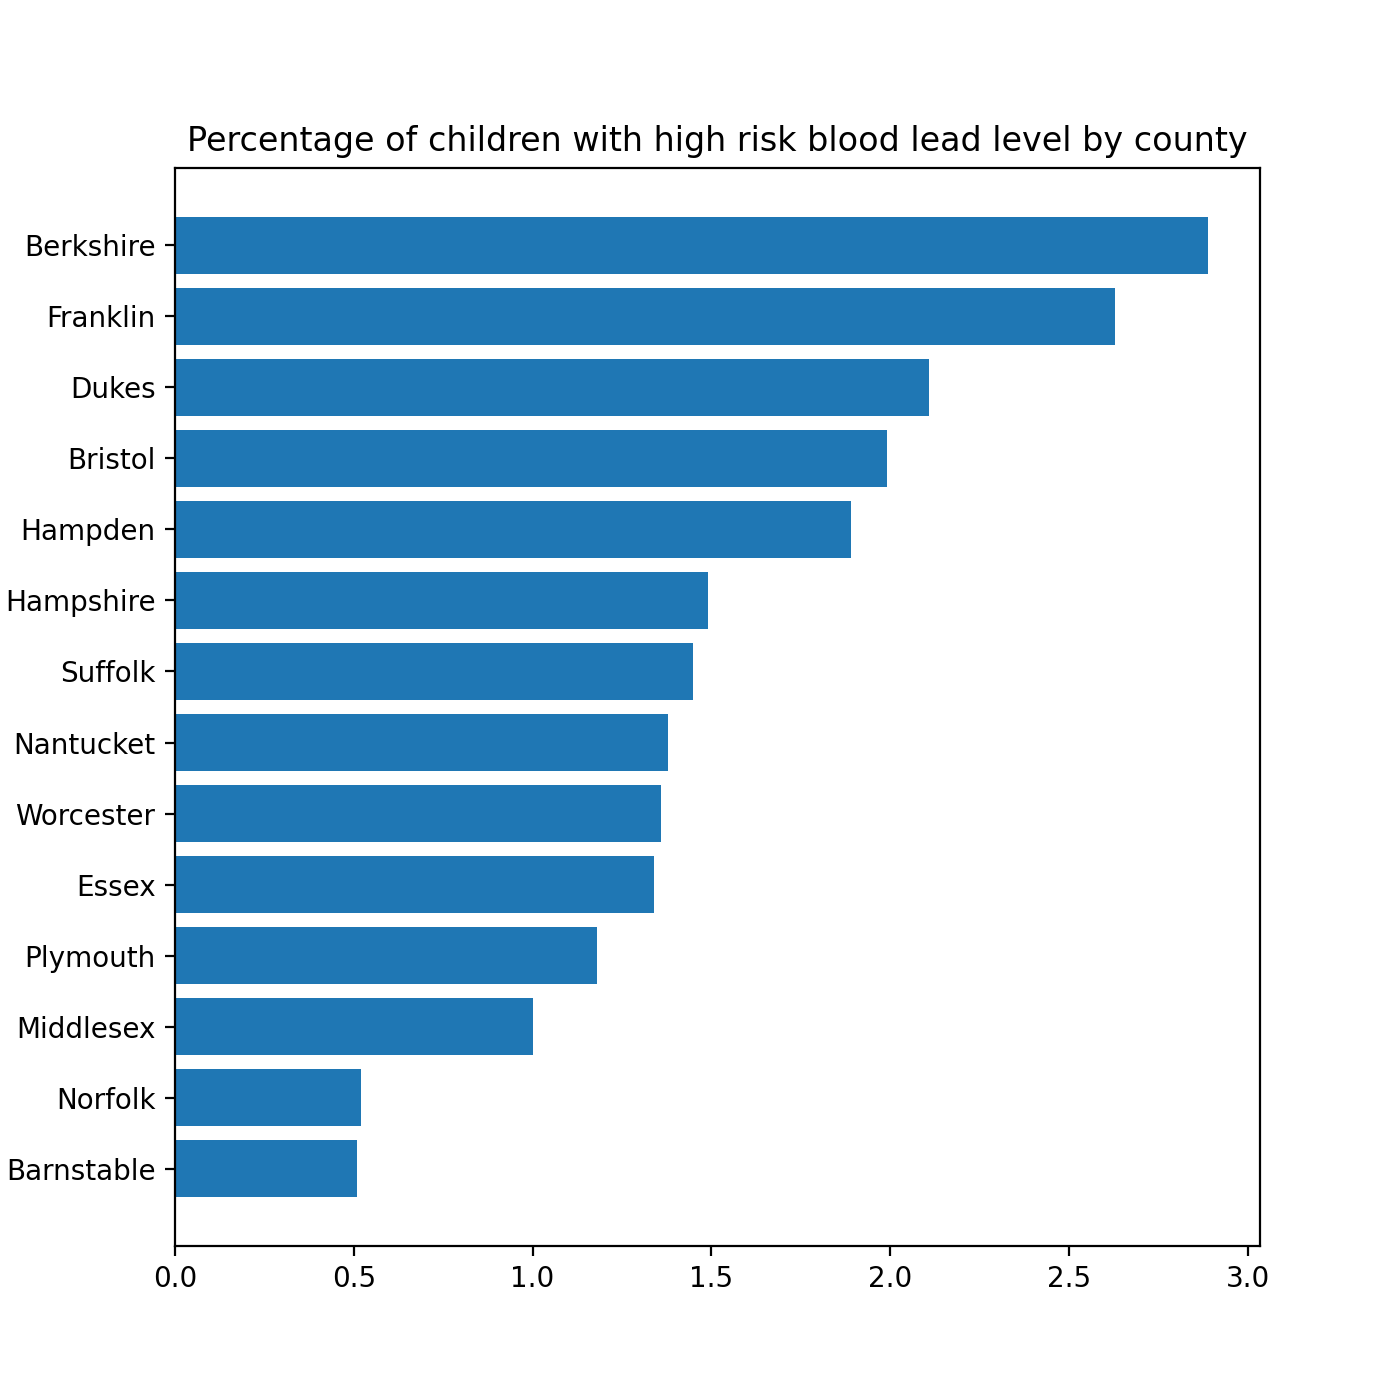

Text(0.5, 1.0, 'Percentage of children with high risk blood lead level by county')

In [30]:
### Plot a horizontal bar chart showing the 
### percentage of children with high risk BLL in each county of MA in 2020

# reduce the dataframe to the data of interest
lead_county_copy = lead_county[['Geo Description', 'Sex', 'Rate']].copy()
lead_county_copy = lead_county_copy.loc[lead_county_copy['Sex']=='Total', ['Geo Description', 'Sex', 'Rate']]

# Change rate per 1000 to percentage
lead_county_copy['Rate'] = lead_county_copy['Rate'] * 0.1

# rename the columns to more descriptive names
lead_county_copy = lead_county_copy.rename(columns={'Geo Description':'County', 'Rate': 'Percentage'})

# Sort the df by the percentage
lead_county_copy = lead_county_copy.sort_values(by='Percentage')

# Get the x values
x = lead_county_copy['Percentage'].tolist()

# Get the y values
y = lead_county_copy['County']

# plot the horizontal bar chart

fig, ax = plt.subplots(figsize=(7,7))
ax.barh(y, x)
ax.set_title('Percentage of children with high risk blood lead level by county')

## Lesson Complete

Congratulations! You have completed *Data Visualization 2*.

### Start Next Lesson: [Data Visualization 3 ->](./DataViz-3.ipynb)

### Exercise Solutions
Here are a few solutions for exercises in this lesson.

<IPython.core.display.Javascript object>


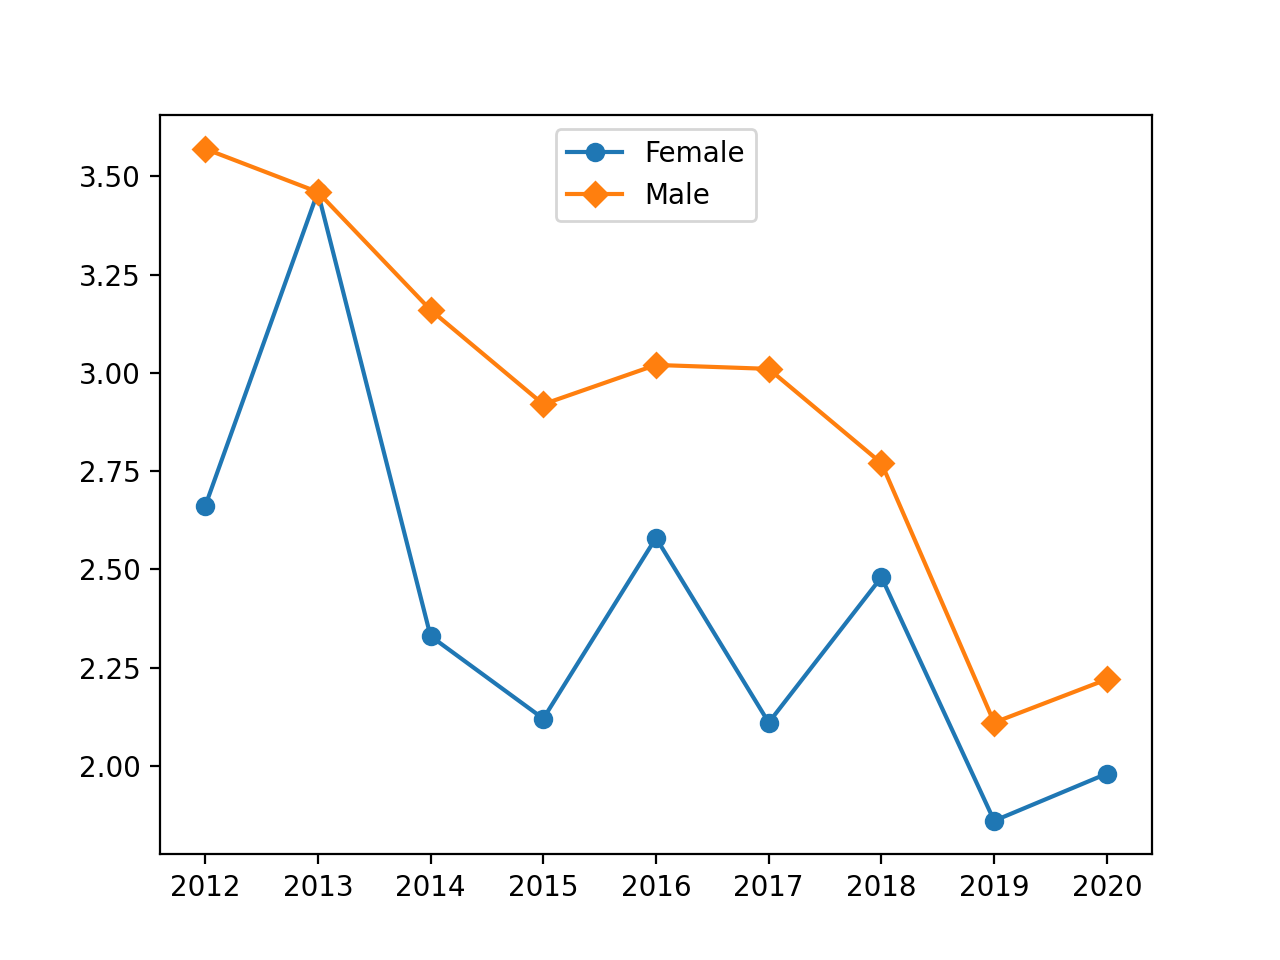

In [31]:
### Plot a line graph for the female and male children data

# Get the data for the female children
lead_female = lead_copy.loc[lead_copy['Sex']=='Female', 'Lowell Percentage']

# Get the data for the male children
lead_male = lead_copy.loc[lead_copy['Sex']=='Male', 'Lowell Percentage']

# Get the x values
x = range(2012, 2021)

# Plot the line graph
fig, ax = plt.subplots()
ax.plot(x, lead_female, 'o-', label='Female')
ax.plot(x, lead_male, 'D-', label='Male')
ax.legend(loc='upper center')